## simple single point coronavirus predictions
#### using jhu covid data

In [53]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

loading data

In [54]:
datapath = "../COVID-19/csse_covid_19_data/csse_covid_19_time_series/"

# Choose from "US Cases", "US Deaths", "World Cases", "World Deaths", "World Recoveries"
key = "World Cases" 

if key == "US Cases":
    datapath = datapath + "time_series_covid19_confirmed_US.csv"
elif key == "US Deaths":
    datapath = datapath + "time_series_covid19_deaths_US.csv"
elif key == "World Cases":
    datapath = datapath + "time_series_covid19_confirmed_global.csv"
elif key == "World Deaths":
    datapath = datapath + "time_series_covid19_deaths_global.csv"
elif key == "World Recoveries":
    datapath = datapath + "time_series_covid19_recovered_global.csv"

In [55]:
covid_df = pd.read_csv(datapath)

In [56]:
covid_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,764,764,765,844,851,852,852,852,852,852
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,84,86,86,86,86,86,86,88,91,92


In [57]:
abridged_covid_df = covid_df.loc[:,'1/22/20':]

In [58]:
abridged_covid_df.index

RangeIndex(start=0, stop=266, step=1)

In [59]:
abridged_covid_df.index = covid_df['Country/Region']

In [60]:
abridged_covid_df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917
Albania,0,0,0,0,0,0,0,0,0,0,...,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263
Algeria,0,0,0,0,0,0,0,0,0,0,...,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265
Andorra,0,0,0,0,0,0,0,0,0,0,...,764,764,765,844,851,852,852,852,852,852
Angola,0,0,0,0,0,0,0,0,0,0,...,84,86,86,86,86,86,86,88,91,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sao Tome and Principe,0,0,0,0,0,0,0,0,0,0,...,479,483,484,484,484,485,499,499,513,513
Yemen,0,0,0,0,0,0,0,0,0,0,...,310,323,354,399,419,453,469,482,484,496
Comoros,0,0,0,0,0,0,0,0,0,0,...,106,106,106,132,132,132,132,141,141,141


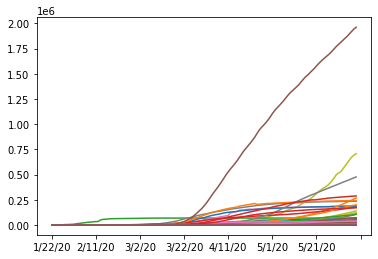

In [64]:
abridged_covid_df.T.plot(legend=False)